In [1]:
import os
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import sys

import datetime
from datetime import timedelta
from tqdm.notebook import tqdm, trange
import pandas as pd
import seaborn as sns

currentdir = os.path.dirname(os.getcwd())
sys.path.insert(0,currentdir)

from BlackScholes import black_scholes, volatility
plt.rcParams["figure.figsize"] = list(map(lambda x:x*2.2,plt.rcParams["figure.figsize"]))


# Parameters

In [5]:
# we need exastly 3 mus and 3 sigmas
# The code can be adjusted to support different numbers of mus and sigmas

mus = [0.2837219238281251,0.5673828125,0.8511108398437499]
sigmas = [1.3]*3

dists = list(zip(mus,sigmas))
apys =  [-0.5,0,0.5] # for the dist (mean returns)
OPTION_TYPE = 'c'
PATH = '/Volumes/Samsung_T5/detailAna_ETH/noHedgenoMinIV_TD0.1/'
RUNS = 3000
STRATEGY = 'AbstractStrategy'

def formatFileName(name,mu,sigma):
    return f'{PATH}{name}-{STRATEGY}-{RUNS}-{OPTION_TYPE}-{mu}-{sigma}.csv'

# Comapre runs

In [6]:
def downSideRisk(values):
    return np.sqrt((values[values <0]**2).sum()/values.size)

##############################
0.0 0.8
0.46
Sortino: 0.79
[*] Resulted mean:  6.19 %
##############################
0.0 0.8
0.46
Sortino: 0.79
[*] Resulted mean:  6.19 %
##############################
0.0 0.8
0.46
Sortino: 0.79
[*] Resulted mean:  6.19 %


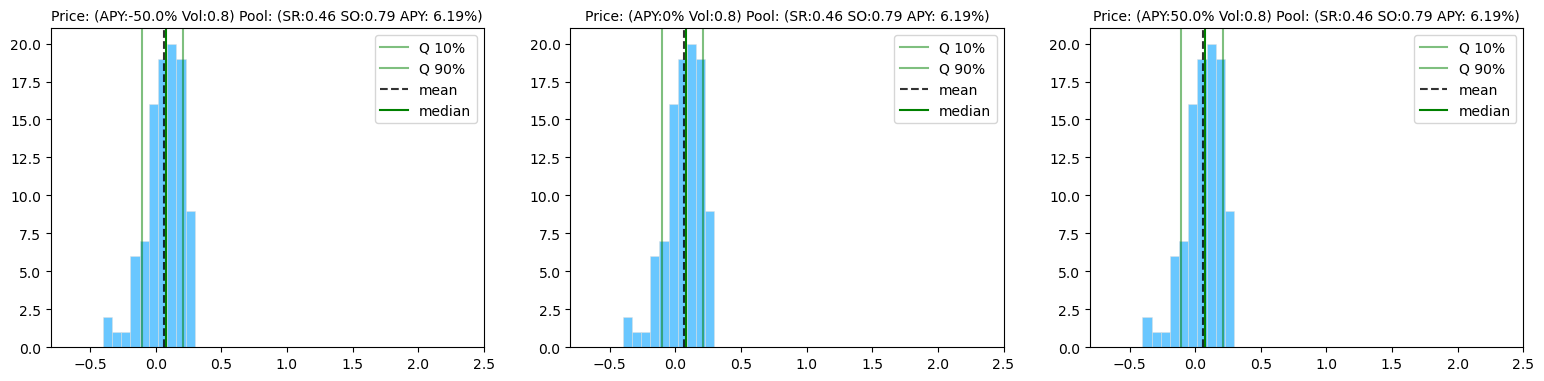

In [7]:

plt.rcParams["figure.figsize"] = [19,12.672/3]
fig, axs = plt.subplots(1,3,dpi=100)
image_name = PATH.split('/')[-2] + '.png'

i =0
for (mu,sigma) in dists:
    apy = apys[i]
    column = i%3
    i+=1
    pv = pd.read_csv(formatFileName('pool_values',mu,sigma),index_col=0,parse_dates=True)
    pv['pool_value'] = pv['pool_value']/pv['pool_value'].iloc[0]
    pv['apy'] = pv['pool_value'] - 1 
    mm = pv.groupby('date').agg(['mean','median','std'])
    print("#"*30)
    print(np.round(mu-1,2),sigma)
    ret_pv = mm[('pool_value','mean')].iloc[-1] -1
    SR = np.round(ret_pv/mm[('pool_value','std')].iloc[-1],2)
    apy_pool = np.round((mm[('pool_value','mean')].iloc[-1] -1)*100,2)
    print(SR)
    lasts = pv.groupby(['epoch_id']).last()
    sortino = np.round(ret_pv/downSideRisk(lasts['apy'].to_numpy()),2)
    print("Sortino:", sortino)
    print("[*] Resulted mean: ",apy_pool,"%")
    
    qua = lasts.quantile([0.1,0.9])
    axs[column].set_title(f"Price: (APY:{apy*100}% Vol:{sigma}) Pool: (SR:{SR} SO:{sortino} APY: {apy_pool}%)",
        fontsize=10)
    axs[column].hist(lasts['apy'],bins='sqrt',facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0.5, alpha=0.7)
    axs[column].axvline(qua['apy'].loc[0.1],color='g',alpha=0.5,label='Q 10%')
    axs[column].axvline(qua['apy'].loc[0.9],color='g',alpha=0.5,label='Q 90%')
    axs[column].axvline(lasts['apy'].mean(), alpha=0.8, color='k', linestyle='dashed', label='mean')
    axs[column].axvline(lasts['apy'].median(),color='g',label='median')
    axs[column].set_xlim((-0.8,2.5))
    axs[column].legend()
plt.savefig(f'images/{image_name}')
plt.show()

##############################
-0.72 1.3
-0.93
Sortino: -0.78
[*] Resulted mean:  -54.3 %
##############################
-0.43 1.3
-0.17
Sortino: -0.32
[*] Resulted mean:  -18.03 %
##############################
-0.15 1.3
0.11
Sortino: 0.32
[*] Resulted mean:  15.2 %


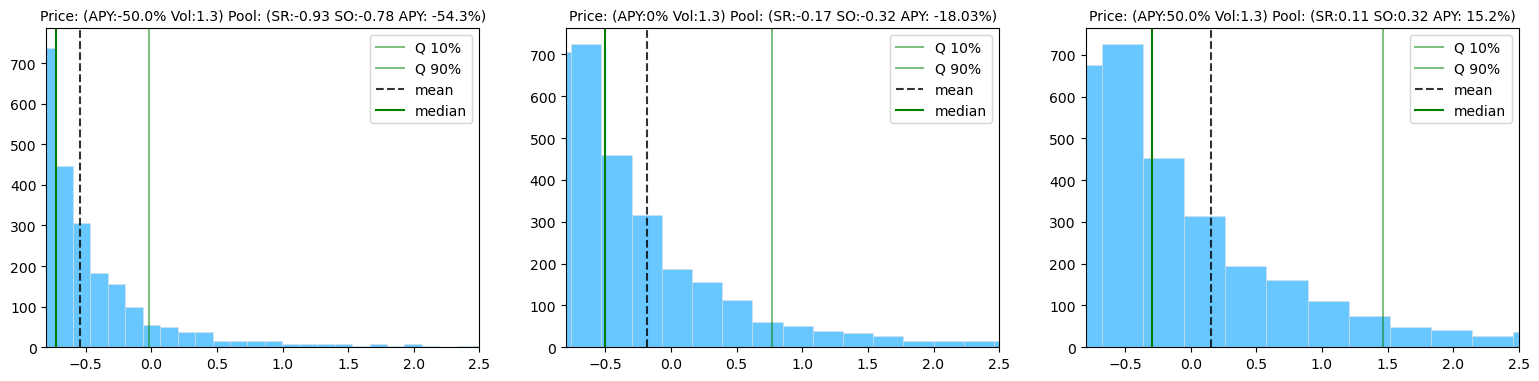

In [23]:

image_name = PATH.split('/')[-2] + 'USD.png'
i =0
fig, axs = plt.subplots(1,3,dpi=100)
for (mu,sigma) in dists:
    apy = apys[i]
    column = i%3
    i+=1
    pv = pd.read_csv(formatFileName('pool_values',mu,sigma),index_col=0,parse_dates=True)
    pv['pool_value_usd'] = pv['pool_value_usd']/pv['pool_value_usd'].iloc[0]
    pv['apy'] = pv['pool_value_usd'] - 1 
    mm = pv.groupby('date').agg(['mean','median','std'])
    print("#"*30)
    print(np.round(mu-1,2),sigma)
    ret_pv = mm[('pool_value_usd','mean')].iloc[-1] -1
    SR = np.round(ret_pv/mm[('pool_value_usd','std')].iloc[-1],2)
    apy_pool = np.round((mm[('pool_value_usd','mean')].iloc[-1] -1)*100,2)
    print(SR)
    lasts = pv.groupby(['epoch_id']).last()
    sortino = np.round(ret_pv/downSideRisk(lasts['apy'].to_numpy()),2)
    print("Sortino:", sortino)
    print("[*] Resulted mean: ",apy_pool,"%")
    
    qua = lasts.quantile([0.1,0.9])
    axs[column].set_title(f"Price: (APY:{apy*100}% Vol:{sigma}) Pool: (SR:{SR} SO:{sortino} APY: {apy_pool}%)",
        fontsize=10)
    axs[column].hist(lasts['apy'],bins='sqrt',facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0.5, alpha=0.7)
    axs[column].axvline(qua['apy'].loc[0.1],color='g',alpha=0.5,label='Q 10%')
    axs[column].axvline(qua['apy'].loc[0.9],color='g',alpha=0.5,label='Q 90%')
    axs[column].axvline(lasts['apy'].mean(), alpha=0.8, color='k', linestyle='dashed', label='mean')
    axs[column].axvline(lasts['apy'].median(),color='g',label='median')
    axs[column].set_xlim((-0.8,2.5))
    axs[column].legend()
plt.savefig(f'images/{image_name}')
plt.show()